# TSNE Visualization

In [13]:
import os
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn import metrics

import matplotlib.pyplot as plt

from bring_features_and_file_paths import bring_features_and_file_paths

## Bring all the features and file paths

In [2]:
#features, file_paths = bring_features_and_file_paths('/grand/projects/BirdAudio/Soundscapes/Features', sub_sample=None)
#features, file_paths, indices = bring_features_and_file_paths('/grand/projects/BirdAudio/Soundscapes/Second_Features', sub_sample=0.001)
features, file_paths, indices = bring_features_and_file_paths('/grand/projects/BirdAudio/Soundscapes/Features', sub_sample=0.99)

We have 100065 feature vectors.


In [3]:
features.shape

torch.Size([100065, 384])

In [4]:
pca = PCA(n_components=50, svd_solver='full')
pca.fit(features)
pca_features = pca.transform(features)
pca_features.shape

(100065, 50)

In [5]:
dpath='/grand/projects/BirdAudio/Soundscapes/TSNE_Data'
fname='f_embedded.npy'
if not os.path.isfile(os.path.join(dpath, fname)):
    #f_embedded = TSNE(n_components=2, learning_rate='auto', init='pca', perplexity=50).fit_transform(pca_features)
    f_embedded.shape
    np.save(os.path.join(dpath, fname), f_embedded)
else:
    f_embedded = np.load(os.path.join(dpath, fname))

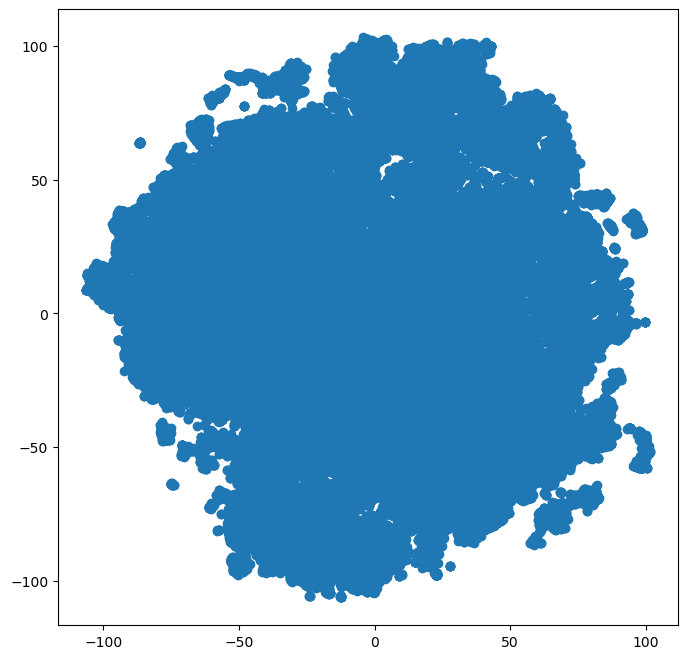

In [6]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
ax.scatter(f_embedded[:,0],f_embedded[:,1])

In [7]:
#labels = DBSCAN(eps=1.5, min_samples=10).fit_predict(f_embedded)
labels = DBSCAN(eps=3.5, min_samples=170).fit_predict(f_embedded)

core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[labels != -1] = True
n_noise_points = list(labels).count(-1)
#set(label_predictions)

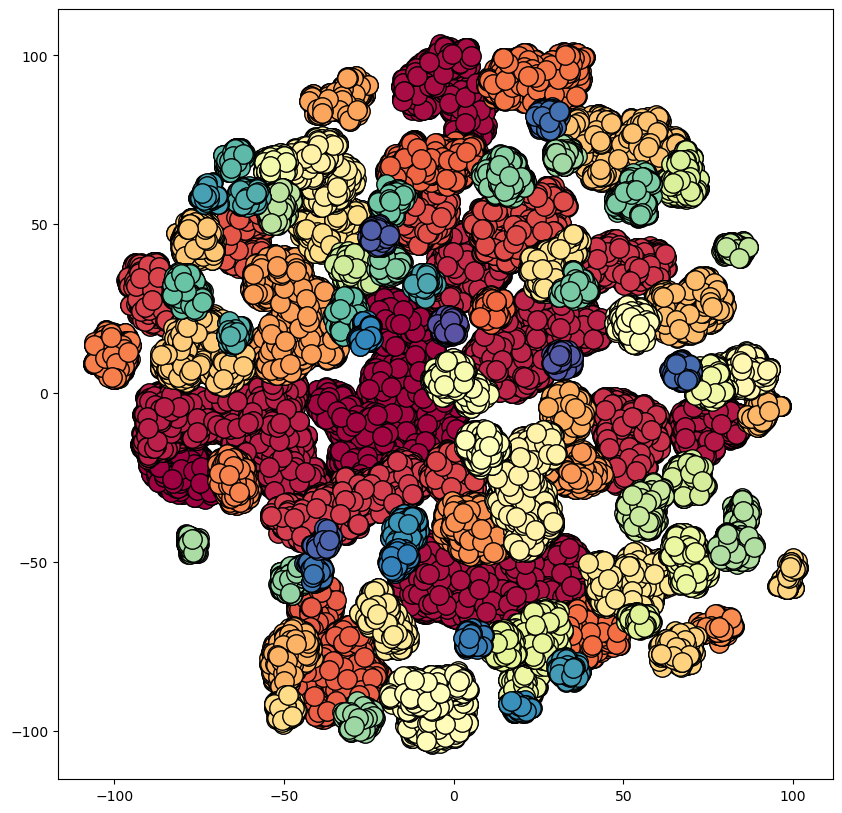

In [8]:
# Black removed and is used for noise instead.
print_outliers=False
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k
    #class_member_mask = labels == k
    xy = f_embedded[class_member_mask & core_samples_mask]
    ax.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    if print_outliers:
        xy = f_embedded[class_member_mask & ~core_samples_mask]
        ax.plot(
            xy[:, 0],
            xy[:, 1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=6,
        )


In [9]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
n_points_ = labels.shape[0]
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Estimated number of labeled points: %d" % n_points_)
print(int(100*n_noise_/n_points_), "% of points in the data is noise")

Estimated number of clusters: 97
Estimated number of noise points: 24884
Estimated number of labeled points: 100065
24 % of points in the data is noise


In [10]:
features=f_embedded
labels=labels

In [15]:
image_paths=[]
features=[]
LABELS=[]
for fpath, feat, label in zip(file_paths,f_embedded,labels):
    if label != -1:
        file_path = ''.join([chr(int(x)) for x in fpath]).replace('~','')
        image_paths.append(file_path)
        features.append(feat)
        LABELS.append(label)
        print(file_path)

image_paths=np.array(image_paths)
features=np.array(features)
labels=np.array(LABELS)

set2/00023764/20210719_STUDY/20210719T170000+0000_REC_51.png
set2/00023764/20210722_STUDY/20210722T131727+0000_REC_24.png
set1/00023764/20210608_STUDY/20210608T210000+0000_REC_280.png
set1/00023764/20210603_STUDY/20210603T130000+0000_REC_193.png
set1/00023764/20210617_STUDY/20210617T110000+0000_REC_259.png
set2/00023764/20210722_STUDY/20210722T131727+0000_REC_479.png
set2/00023764/20210721_STUDY/20210721T063138+0000_REC_1694.png
set2/00023764/20210719_STUDY/20210719T170000+0000_REC_1295.png
set2/00023764/20210719_STUDY/20210719T063138+0000_REC_2405.png
set1/00023764/20210618_STUDY/20210618T190000+0000_REC_117.png
set2/00023764/20210717_STUDY/20210717T063138+0000_REC_2486.png
set1/00023764/20210604_STUDY/20210604T200000+0000_REC_262.png
set2/00023764/20210716_STUDY/20210716T063138+0000_REC_2349.png
set1/00023764/20210602_STUDY/20210602T190000+0000_REC_376.png
set1/00023764/20210530_STUDY/20210530T220000+0000_REC_133.png
set1/00023764/20210609_STUDY/20210609T210000+0000_REC_332.png
set2/

set1/00023764/20210616_STUDY/20210616T110000+0000_REC_27.png
set2/00023764/20210716_STUDY/20210716T063138+0000_REC_1630.png
set2/00023764/20210726_STUDY/20210726T170000+0000_REC_1549.png
set1/00023764/20210610_STUDY/20210610T170000+0000_REC_184.png
set1/00023764/20210604_STUDY/20210604T120000+0000_REC_12.png
set2/00023764/20210716_STUDY/20210716T063138+0000_REC_2684.png
set1/00023764/20210609_STUDY/20210609T140000+0000_REC_30.png
set1/00023764/20210616_STUDY/20210616T160000+0000_REC_284.png
set2/00023764/20210716_STUDY/20210716T170000+0000_REC_614.png
set1/00023764/20210618_STUDY/20210618T130000+0000_REC_202.png
set1/00023764/20210529_STUDY/20210529T100000+0000_REC_222.png
set1/00023764/20210613_STUDY/20210613T100000+0000_REC_139.png
set2/00023764/20210723_STUDY/20210723T063138+0000_REC_2107.png
set1/00023764/20210619_STUDY/20210619T220000+0000_REC_115.png
set2/00023764/20210725_STUDY/20210725T170000+0000_REC_1847.png
set1/00023764/20210530_STUDY/20210530T120000+0000_REC_91.png
set1/00

set1/00023764/20210611_STUDY/20210611T180000+0000_REC_367.png
set1/00023764/20210620_STUDY/20210620T160000+0000_REC_326.png
set2/00023764/20210715_STUDY/20210715T234549+0000_REC_88.png
set2/00023764/20210727_STUDY/20210727T063138+0000_REC_2563.png
set2/00023764/20210722_STUDY/20210722T131727+0000_REC_1319.png
set1/00023764/20210612_STUDY/20210612T110000+0000_REC_368.png
set2/00023764/20210725_STUDY/20210725T131727+0000_REC_258.png
set2/00023764/20210719_STUDY/20210719T170000+0000_REC_452.png
set1/00023764/20210620_STUDY/20210620T130000+0000_REC_366.png
set1/00023764/20210619_STUDY/20210619T100000+0000_REC_35.png
set2/00023764/20210725_STUDY/20210725T063138+0000_REC_2348.png
set1/00023764/20210620_STUDY/20210620T180000+0000_REC_197.png
set1/00023764/20210616_STUDY/20210616T110000+0000_REC_117.png
set1/00023764/20210525_STUDY/20210525T090000+0000_REC_277.png
set1/00023764/20210617_STUDY/20210617T130000+0000_REC_300.png
set1/00023764/20210616_STUDY/20210616T140000+0000_REC_229.png
set2/00

set1/00023764/20210620_STUDY/20210620T090000+0000_REC_327.png
set1/00023764/20210531_STUDY/20210531T150000+0000_REC_79.png
set2/00023764/20210718_STUDY/20210718T063138+0000_REC_2302.png
set1/00023764/20210604_STUDY/20210604T100000+0000_REC_144.png
set2/00023764/20210727_STUDY/20210727T170000+0000_REC_298.png
set1/00023764/20210608_STUDY/20210608T200000+0000_REC_70.png
set1/00023764/20210602_STUDY/20210602T190000+0000_REC_293.png
set2/00023764/20210721_STUDY/20210721T063138+0000_REC_1880.png
set1/00023764/20210611_STUDY/20210611T100000+0000_REC_363.png
set1/00023764/20210610_STUDY/20210610T010000+0000_REC_134.png
set2/00023764/20210724_STUDY/20210724T170000+0000_REC_1025.png
set1/00023764/20210618_STUDY/20210618T230000+0000_REC_171.png
set2/00023764/20210726_STUDY/20210726T063138+0000_REC_2128.png
set2/00023764/20210725_STUDY/20210725T063138+0000_REC_2307.png
set1/00023764/20210608_STUDY/20210608T000000+0000_REC_250.png
set2/00023764/20210716_STUDY/20210716T063138+0000_REC_2064.png
set2

set1/00023764/20210616_STUDY/20210616T120000+0000_REC_243.png
set2/00023764/20210716_STUDY/20210716T131727+0000_REC_241.png
set1/00023764/20210610_STUDY/20210610T110000+0000_REC_298.png
set1/00023764/20210603_STUDY/20210603T180000+0000_REC_157.png
set2/00023764/20210719_STUDY/20210719T063138+0000_REC_2237.png
set1/00023764/20210607_STUDY/20210607T180000+0000_REC_197.png
set1/00023764/20210530_STUDY/20210530T110000+0000_REC_81.png
set2/00023764/20210723_STUDY/20210723T170000+0000_REC_1284.png
set1/00023764/20210602_STUDY/20210602T100000+0000_REC_145.png
set1/00023764/20210617_STUDY/20210617T180000+0000_REC_317.png
set2/00023764/20210717_STUDY/20210717T063138+0000_REC_1678.png
set1/00023764/20210613_STUDY/20210613T180000+0000_REC_244.png
set1/00023764/20210525_STUDY/20210525T200000+0000_REC_98.png
set1/00023764/20210617_STUDY/20210617T100000+0000_REC_242.png
set2/00023764/20210727_STUDY/20210727T063138+0000_REC_2506.png
set2/00023764/20210715_STUDY/20210715T155030+0000_REC_335.png
set1/0

set1/00023764/20210611_STUDY/20210611T130000+0000_REC_68.png
set1/00023764/20210613_STUDY/20210613T100000+0000_REC_247.png
set1/00023764/20210614_STUDY/20210614T190000+0000_REC_89.png
set1/00023764/20210609_STUDY/20210609T220000+0000_REC_138.png
set2/00023764/20210720_STUDY/20210720T170000+0000_REC_484.png
set1/00023764/20210526_STUDY/20210526T150000+0000_REC_249.png
set1/00023764/20210621_STUDY/20210621T190000+0000_REC_248.png
set2/00023764/20210715_STUDY/20210715T090441+0000_REC_1377.png
set1/00023764/20210618_STUDY/20210618T190000+0000_REC_267.png
set1/00023764/20210618_STUDY/20210618T160000+0000_REC_266.png
set1/00023764/20210615_STUDY/20210615T130000+0000_REC_98.png
set2/00023764/20210719_STUDY/20210719T063138+0000_REC_2571.png
set1/00023764/20210617_STUDY/20210617T100000+0000_REC_225.png
set1/00023764/20210530_STUDY/20210530T160000+0000_REC_48.png
set1/00023764/20210605_STUDY/20210605T000000+0000_REC_93.png
set2/00023764/20210723_STUDY/20210723T170000+0000_REC_1990.png
set2/00023

set2/00023764/20210723_STUDY/20210723T063138+0000_REC_2230.png
set1/00023764/20210608_STUDY/20210608T200000+0000_REC_358.png
set2/00023764/20210716_STUDY/20210716T063138+0000_REC_1627.png
set1/00023764/20210530_STUDY/20210530T120000+0000_REC_304.png
set1/00023764/20210620_STUDY/20210620T200000+0000_REC_93.png
set1/00023764/20210617_STUDY/20210617T120000+0000_REC_38.png
set1/00023764/20210617_STUDY/20210617T130000+0000_REC_253.png
set1/00023764/20210531_STUDY/20210531T110000+0000_REC_150.png
set1/00023764/20210531_STUDY/20210531T100000+0000_REC_141.png
set1/00023764/20210620_STUDY/20210620T160000+0000_REC_18.png
set1/00023764/20210605_STUDY/20210605T200000+0000_REC_304.png
set1/00023764/20210611_STUDY/20210611T120000+0000_REC_105.png
set1/00023764/20210524_STUDY/20210524T230000+0000_REC_345.png
set2/00023764/20210723_STUDY/20210723T170000+0000_REC_1466.png
set1/00023764/20210601_STUDY/20210601T150000+0000_REC_2.png
set1/00023764/20210604_STUDY/20210604T110000+0000_REC_125.png
set2/00023

set2/00023764/20210722_STUDY/20210722T234549+0000_REC_69.png
set1/00023764/20210610_STUDY/20210610T220000+0000_REC_301.png
set2/00023764/20210725_STUDY/20210725T170000+0000_REC_516.png
set1/00023764/20210603_STUDY/20210603T150000+0000_REC_3.png
set1/00023764/20210527_STUDY/20210527T000000+0000_REC_295.png
set2/00023764/20210715_STUDY/20210715T170000+0000_REC_166.png
set1/00023764/20210526_STUDY/20210526T210000+0000_REC_195.png
set1/00023764/20210530_STUDY/20210530T110000+0000_REC_59.png
set1/00023764/20210611_STUDY/20210611T010000+0000_REC_238.png
set1/00023764/20210611_STUDY/20210611T110000+0000_REC_152.png
set2/00023764/20210726_STUDY/20210726T170000+0000_REC_1837.png
set1/00023764/20210620_STUDY/20210620T100000+0000_REC_223.png
set1/00023764/20210619_STUDY/20210619T100000+0000_REC_317.png
set1/00023764/20210526_STUDY/20210526T130000+0000_REC_119.png
set1/00023764/20210604_STUDY/20210604T110000+0000_REC_28.png
set2/00023764/20210727_STUDY/20210727T063138+0000_REC_1947.png
set1/000237

set1/00023764/20210617_STUDY/20210617T160000+0000_REC_370.png
set1/00023764/20210603_STUDY/20210603T200000+0000_REC_165.png
set1/00023764/20210603_STUDY/20210603T120000+0000_REC_322.png
set1/00023764/20210619_STUDY/20210619T210000+0000_REC_356.png
set2/00023764/20210720_STUDY/20210720T063138+0000_REC_1546.png
set1/00023764/20210526_STUDY/20210526T120000+0000_REC_172.png
set1/00023764/20210618_STUDY/20210618T190000+0000_REC_120.png
set1/00023764/20210601_STUDY/20210601T000000+0000_REC_129.png
set1/00023764/20210620_STUDY/20210620T120000+0000_REC_237.png
set1/00023764/20210607_STUDY/20210607T230000+0000_REC_235.png
set1/00023764/20210530_STUDY/20210530T110000+0000_REC_284.png
set1/00023764/20210606_STUDY/20210606T100000+0000_REC_22.png
set1/00023764/20210608_STUDY/20210608T210000+0000_REC_109.png
set1/00023764/20210526_STUDY/20210526T130000+0000_REC_338.png
set1/00023764/20210601_STUDY/20210601T190000+0000_REC_129.png
set2/00023764/20210726_STUDY/20210726T131727+0000_REC_1355.png
set1/00

set1/00023764/20210608_STUDY/20210608T130000+0000_REC_201.png
set1/00023764/20210603_STUDY/20210603T170000+0000_REC_294.png
set1/00023764/20210621_STUDY/20210621T130000+0000_REC_177.png
set1/00023764/20210526_STUDY/20210526T130000+0000_REC_387.png
set1/00023764/20210601_STUDY/20210601T130000+0000_REC_251.png
set1/00023764/20210616_STUDY/20210616T130000+0000_REC_317.png
set1/00023764/20210618_STUDY/20210618T220000+0000_REC_40.png
set1/00023764/20210609_STUDY/20210609T210000+0000_REC_209.png
set1/00023764/20210611_STUDY/20210611T200000+0000_REC_301.png
set1/00023764/20210616_STUDY/20210616T160000+0000_REC_245.png
set2/00023764/20210715_STUDY/20210715T170000+0000_REC_1773.png
set1/00023764/20210618_STUDY/20210618T130000+0000_REC_382.png
set2/00023764/20210715_STUDY/20210715T170000+0000_REC_547.png
set2/00023764/20210725_STUDY/20210725T170000+0000_REC_2293.png
set1/00023764/20210603_STUDY/20210603T210000+0000_REC_371.png
set1/00023764/20210525_STUDY/20210525T120000+0000_REC_83.png
set1/000

set2/00023764/20210722_STUDY/20210722T063138+0000_REC_2185.png
set1/00023764/20210611_STUDY/20210611T110000+0000_REC_5.png
set1/00023764/20210602_STUDY/20210602T140000+0000_REC_343.png
set1/00023764/20210611_STUDY/20210611T200000+0000_REC_366.png
set1/00023764/20210607_STUDY/20210607T100000+0000_REC_79.png
set1/00023764/20210604_STUDY/20210604T100000+0000_REC_171.png
set1/00023764/20210525_STUDY/20210525T090000+0000_REC_307.png
set2/00023764/20210722_STUDY/20210722T063138+0000_REC_2247.png
set2/00023764/20210715_STUDY/20210715T170000+0000_REC_2559.png
set1/00023764/20210526_STUDY/20210526T140000+0000_REC_20.png
set1/00023764/20210601_STUDY/20210601T110000+0000_REC_34.png
set1/00023764/20210620_STUDY/20210620T200000+0000_REC_209.png
set1/00023764/20210607_STUDY/20210607T170000+0000_REC_277.png
set2/00023764/20210720_STUDY/20210720T063138+0000_REC_1492.png
set1/00023764/20210611_STUDY/20210611T090000+0000_REC_216.png
set2/00023764/20210715_STUDY/20210715T090441+0000_REC_1961.png
set1/000

set1/00023764/20210530_STUDY/20210530T140000+0000_REC_256.png
set2/00023764/20210718_STUDY/20210718T063138+0000_REC_2489.png
set1/00023764/20210608_STUDY/20210608T000000+0000_REC_29.png
set1/00023764/20210617_STUDY/20210617T090000+0000_REC_129.png
set2/00023764/20210719_STUDY/20210719T063138+0000_REC_2192.png
set2/00023764/20210716_STUDY/20210716T063138+0000_REC_1671.png
set1/00023764/20210604_STUDY/20210604T160000+0000_REC_396.png
set2/00023764/20210720_STUDY/20210720T131727+0000_REC_258.png
set2/00023764/20210723_STUDY/20210723T063138+0000_REC_2241.png
set1/00023764/20210621_STUDY/20210621T130000+0000_REC_327.png
set1/00023764/20210621_STUDY/20210621T150000+0000_REC_164.png
set1/00023764/20210604_STUDY/20210604T120000+0000_REC_137.png
set1/00023764/20210608_STUDY/20210608T140000+0000_REC_119.png
set2/00023764/20210725_STUDY/20210725T170000+0000_REC_2322.png
set1/00023764/20210526_STUDY/20210526T230000+0000_REC_131.png
set2/00023764/20210714_STUDY/20210714T193300+0000_REC_644.png
set1

set1/00023764/20210606_STUDY/20210606T120000+0000_REC_311.png
set1/00023764/20210531_STUDY/20210531T130000+0000_REC_95.png
set1/00023764/20210620_STUDY/20210620T230000+0000_REC_99.png
set1/00023764/20210612_STUDY/20210612T100000+0000_REC_206.png
set2/00023764/20210727_STUDY/20210727T170000+0000_REC_2294.png
set2/00023764/20210720_STUDY/20210720T170000+0000_REC_1017.png
set1/00023764/20210603_STUDY/20210603T160000+0000_REC_120.png
set1/00023764/20210605_STUDY/20210605T160000+0000_REC_144.png
set2/00023764/20210715_STUDY/20210715T170000+0000_REC_2094.png
set1/00023764/20210603_STUDY/20210603T140000+0000_REC_331.png
set1/00023764/20210525_STUDY/20210525T120000+0000_REC_386.png
set2/00023764/20210715_STUDY/20210715T155030+0000_REC_89.png
set2/00023764/20210719_STUDY/20210719T170000+0000_REC_1107.png
set1/00023764/20210603_STUDY/20210603T110000+0000_REC_27.png
set1/00023764/20210525_STUDY/20210525T090000+0000_REC_272.png
set2/00023764/20210719_STUDY/20210719T063138+0000_REC_1880.png
set1/00

set2/00023764/20210724_STUDY/20210724T063138+0000_REC_2307.png
set1/00023764/20210612_STUDY/20210612T230000+0000_REC_274.png
set1/00023764/20210616_STUDY/20210616T170000+0000_REC_97.png
set2/00023764/20210718_STUDY/20210718T170000+0000_REC_1739.png
set1/00023764/20210615_STUDY/20210615T090000+0000_REC_358.png
set1/00023764/20210525_STUDY/20210525T160000+0000_REC_311.png
set2/00023764/20210723_STUDY/20210723T063138+0000_REC_2414.png
set1/00023764/20210606_STUDY/20210606T100000+0000_REC_217.png
set1/00023764/20210612_STUDY/20210612T230000+0000_REC_261.png
set2/00023764/20210723_STUDY/20210723T063138+0000_REC_2429.png
set1/00023764/20210610_STUDY/20210610T010000+0000_REC_112.png
set2/00023764/20210723_STUDY/20210723T063138+0000_REC_2001.png
set1/00023764/20210601_STUDY/20210601T100000+0000_REC_117.png
set1/00023764/20210611_STUDY/20210611T100000+0000_REC_226.png
set1/00023764/20210613_STUDY/20210613T100000+0000_REC_249.png
set1/00023764/20210621_STUDY/20210621T150000+0000_REC_297.png
set2

set1/00023764/20210530_STUDY/20210530T200000+0000_REC_156.png
set1/00023764/20210619_STUDY/20210619T000000+0000_REC_338.png
set2/00023764/20210723_STUDY/20210723T170000+0000_REC_1789.png
set1/00023764/20210620_STUDY/20210620T220000+0000_REC_36.png
set1/00023764/20210611_STUDY/20210611T190000+0000_REC_122.png
set1/00023764/20210603_STUDY/20210603T000000+0000_REC_265.png
set1/00023764/20210526_STUDY/20210526T150000+0000_REC_135.png
set1/00023764/20210601_STUDY/20210601T140000+0000_REC_248.png
set1/00023764/20210603_STUDY/20210603T220000+0000_REC_217.png
set2/00023764/20210719_STUDY/20210719T131727+0000_REC_1292.png
set1/00023764/20210620_STUDY/20210620T100000+0000_REC_87.png
set2/00023764/20210726_STUDY/20210726T234549+0000_REC_161.png
set1/00023764/20210615_STUDY/20210615T160000+0000_REC_158.png
set1/00023764/20210609_STUDY/20210609T150000+0000_REC_181.png
set2/00023764/20210715_STUDY/20210715T090441+0000_REC_2677.png
set2/00023764/20210723_STUDY/20210723T170000+0000_REC_1757.png
set1/0

set1/00023764/20210606_STUDY/20210606T130000+0000_REC_373.png
set2/00023764/20210715_STUDY/20210715T170000+0000_REC_1531.png
set2/00023764/20210721_STUDY/20210721T170000+0000_REC_2311.png
set1/00023764/20210619_STUDY/20210619T140000+0000_REC_3.png
set1/00023764/20210607_STUDY/20210607T090000+0000_REC_293.png
set1/00023764/20210606_STUDY/20210606T000000+0000_REC_322.png
set1/00023764/20210611_STUDY/20210611T200000+0000_REC_306.png
set1/00023764/20210601_STUDY/20210601T190000+0000_REC_216.png
set1/00023764/20210601_STUDY/20210601T160000+0000_REC_370.png
set1/00023764/20210608_STUDY/20210608T110000+0000_REC_179.png
set2/00023764/20210725_STUDY/20210725T170000+0000_REC_2299.png
set1/00023764/20210611_STUDY/20210611T090000+0000_REC_260.png
set1/00023764/20210615_STUDY/20210615T110000+0000_REC_64.png
set1/00023764/20210604_STUDY/20210604T110000+0000_REC_197.png
set1/00023764/20210526_STUDY/20210526T140000+0000_REC_108.png
set1/00023764/20210621_STUDY/20210621T100000+0000_REC_27.png
set2/0002

set1/00023764/20210609_STUDY/20210609T100000+0000_REC_135.png
set1/00023764/20210617_STUDY/20210617T120000+0000_REC_204.png
set1/00023764/20210605_STUDY/20210605T170000+0000_REC_82.png
set1/00023764/20210525_STUDY/20210525T170000+0000_REC_229.png
set1/00023764/20210602_STUDY/20210602T120000+0000_REC_61.png
set1/00023764/20210526_STUDY/20210526T180000+0000_REC_384.png
set1/00023764/20210605_STUDY/20210605T010000+0000_REC_102.png
set2/00023764/20210726_STUDY/20210726T170000+0000_REC_381.png
set1/00023764/20210606_STUDY/20210606T130000+0000_REC_117.png
set2/00023764/20210719_STUDY/20210719T063138+0000_REC_1844.png
set1/00023764/20210608_STUDY/20210608T140000+0000_REC_10.png
set1/00023764/20210526_STUDY/20210526T150000+0000_REC_143.png
set1/00023764/20210612_STUDY/20210612T110000+0000_REC_175.png
set1/00023764/20210526_STUDY/20210526T150000+0000_REC_316.png
set1/00023764/20210613_STUDY/20210613T100000+0000_REC_83.png
set2/00023764/20210715_STUDY/20210715T170000+0000_REC_1878.png
set1/00023

set1/00023764/20210605_STUDY/20210605T100000+0000_REC_133.png
set1/00023764/20210602_STUDY/20210602T140000+0000_REC_28.png
set1/00023764/20210530_STUDY/20210530T160000+0000_REC_40.png
set1/00023764/20210616_STUDY/20210616T110000+0000_REC_62.png
set1/00023764/20210603_STUDY/20210603T100000+0000_REC_348.png
set1/00023764/20210613_STUDY/20210613T140000+0000_REC_149.png
set1/00023764/20210611_STUDY/20210611T130000+0000_REC_288.png
set1/00023764/20210602_STUDY/20210602T090000+0000_REC_357.png
set1/00023764/20210531_STUDY/20210531T130000+0000_REC_116.png
set2/00023764/20210723_STUDY/20210723T063138+0000_REC_2282.png
set1/00023764/20210611_STUDY/20210611T120000+0000_REC_378.png
set2/00023764/20210728_STUDY/20210728T063138+0000_REC_2421.png
set1/00023764/20210604_STUDY/20210604T110000+0000_REC_203.png
set1/00023764/20210602_STUDY/20210602T100000+0000_REC_338.png
set1/00023764/20210605_STUDY/20210605T100000+0000_REC_20.png
set2/00023764/20210723_STUDY/20210723T131727+0000_REC_1150.png
set1/0002

set1/00023764/20210614_STUDY/20210614T130000+0000_REC_152.png
set1/00023764/20210603_STUDY/20210603T160000+0000_REC_193.png
set2/00023764/20210722_STUDY/20210722T063138+0000_REC_2282.png
set1/00023764/20210604_STUDY/20210604T200000+0000_REC_190.png
set1/00023764/20210607_STUDY/20210607T100000+0000_REC_121.png
set2/00023764/20210722_STUDY/20210722T131727+0000_REC_492.png
set2/00023764/20210722_STUDY/20210722T170000+0000_REC_1105.png
set2/00023764/20210716_STUDY/20210716T063138+0000_REC_2082.png
set1/00023764/20210603_STUDY/20210603T100000+0000_REC_36.png
set2/00023764/20210719_STUDY/20210719T170000+0000_REC_383.png
set2/00023764/20210727_STUDY/20210727T063138+0000_REC_2640.png
set1/00023764/20210526_STUDY/20210526T010000+0000_REC_25.png
set1/00023764/20210622_STUDY/20210622T010000+0000_REC_150.png
set1/00023764/20210606_STUDY/20210606T230000+0000_REC_325.png
set1/00023764/20210620_STUDY/20210620T210000+0000_REC_113.png
set1/00023764/20210609_STUDY/20210609T120000+0000_REC_351.png
set1/0

set1/00023764/20210605_STUDY/20210605T130000+0000_REC_28.png
set1/00023764/20210610_STUDY/20210610T150000+0000_REC_56.png
set1/00023764/20210602_STUDY/20210602T150000+0000_REC_123.png
set2/00023764/20210716_STUDY/20210716T063138+0000_REC_2641.png
set1/00023764/20210617_STUDY/20210617T140000+0000_REC_231.png
set2/00023764/20210727_STUDY/20210727T063138+0000_REC_2429.png
set2/00023764/20210717_STUDY/20210717T131727+0000_REC_132.png
set2/00023764/20210724_STUDY/20210724T170000+0000_REC_848.png
set1/00023764/20210602_STUDY/20210602T090000+0000_REC_237.png
set1/00023764/20210612_STUDY/20210612T130000+0000_REC_148.png
set1/00023764/20210525_STUDY/20210525T020000+0000_REC_10.png
set1/00023764/20210530_STUDY/20210530T130000+0000_REC_48.png
set1/00023764/20210615_STUDY/20210615T130000+0000_REC_328.png
set1/00023764/20210602_STUDY/20210602T130000+0000_REC_152.png
set2/00023764/20210723_STUDY/20210723T063138+0000_REC_1426.png
set1/00023764/20210612_STUDY/20210612T090000+0000_REC_223.png
set2/0002

set1/00023764/20210601_STUDY/20210601T010000+0000_REC_179.png
set1/00023764/20210531_STUDY/20210531T140000+0000_REC_214.png
set1/00023764/20210610_STUDY/20210610T180000+0000_REC_121.png
set1/00023764/20210609_STUDY/20210609T160000+0000_REC_73.png
set1/00023764/20210526_STUDY/20210526T180000+0000_REC_345.png
set1/00023764/20210603_STUDY/20210603T090000+0000_REC_276.png
set1/00023764/20210611_STUDY/20210611T230000+0000_REC_166.png
set1/00023764/20210606_STUDY/20210606T100000+0000_REC_48.png
set1/00023764/20210525_STUDY/20210525T120000+0000_REC_119.png
set1/00023764/20210604_STUDY/20210604T120000+0000_REC_298.png
set1/00023764/20210530_STUDY/20210530T210000+0000_REC_195.png
set2/00023764/20210727_STUDY/20210727T063138+0000_REC_1615.png
set1/00023764/20210531_STUDY/20210531T120000+0000_REC_238.png
set1/00023764/20210611_STUDY/20210611T130000+0000_REC_227.png
set1/00023764/20210601_STUDY/20210601T110000+0000_REC_396.png
set2/00023764/20210723_STUDY/20210723T131727+0000_REC_98.png
set2/00023

set1/00023764/20210614_STUDY/20210614T100000+0000_REC_70.png
set1/00023764/20210615_STUDY/20210615T140000+0000_REC_164.png
set1/00023764/20210525_STUDY/20210525T130000+0000_REC_50.png
set1/00023764/20210615_STUDY/20210615T160000+0000_REC_63.png
set1/00023764/20210607_STUDY/20210607T120000+0000_REC_303.png
set1/00023764/20210606_STUDY/20210606T160000+0000_REC_96.png
set1/00023764/20210526_STUDY/20210526T150000+0000_REC_168.png
set1/00023764/20210611_STUDY/20210611T200000+0000_REC_329.png
set2/00023764/20210720_STUDY/20210720T063138+0000_REC_1688.png
set1/00023764/20210609_STUDY/20210609T090000+0000_REC_324.png
set1/00023764/20210618_STUDY/20210618T140000+0000_REC_147.png
set1/00023764/20210616_STUDY/20210616T210000+0000_REC_187.png
set1/00023764/20210616_STUDY/20210616T110000+0000_REC_273.png
set1/00023764/20210617_STUDY/20210617T130000+0000_REC_390.png
set2/00023764/20210716_STUDY/20210716T063138+0000_REC_1895.png
set1/00023764/20210601_STUDY/20210601T100000+0000_REC_240.png
set1/00023

set1/00023764/20210530_STUDY/20210530T160000+0000_REC_360.png
set1/00023764/20210530_STUDY/20210530T130000+0000_REC_143.png
set1/00023764/20210601_STUDY/20210601T090000+0000_REC_288.png
set2/00023764/20210723_STUDY/20210723T063138+0000_REC_2568.png
set1/00023764/20210605_STUDY/20210605T110000+0000_REC_269.png
set1/00023764/20210620_STUDY/20210620T200000+0000_REC_241.png
set1/00023764/20210607_STUDY/20210607T110000+0000_REC_370.png
set2/00023764/20210721_STUDY/20210721T063138+0000_REC_1541.png
set1/00023764/20210621_STUDY/20210621T100000+0000_REC_177.png
set1/00023764/20210615_STUDY/20210615T090000+0000_REC_319.png
set1/00023764/20210604_STUDY/20210604T090000+0000_REC_345.png
set1/00023764/20210531_STUDY/20210531T000000+0000_REC_198.png
set1/00023764/20210619_STUDY/20210619T090000+0000_REC_361.png
set1/00023764/20210603_STUDY/20210603T090000+0000_REC_385.png
set1/00023764/20210618_STUDY/20210618T160000+0000_REC_57.png
set1/00023764/20210530_STUDY/20210530T120000+0000_REC_246.png
set1/00

set2/00023764/20210715_STUDY/20210715T234549+0000_REC_49.png
set1/00023764/20210603_STUDY/20210603T140000+0000_REC_10.png
set1/00023764/20210601_STUDY/20210601T120000+0000_REC_348.png
set1/00023764/20210606_STUDY/20210606T110000+0000_REC_4.png
set2/00023764/20210719_STUDY/20210719T063138+0000_REC_1714.png
set1/00023764/20210603_STUDY/20210603T180000+0000_REC_103.png
set2/00023764/20210715_STUDY/20210715T234549+0000_REC_400.png
set1/00023764/20210620_STUDY/20210620T160000+0000_REC_47.png
set1/00023764/20210608_STUDY/20210608T150000+0000_REC_64.png
set1/00023764/20210608_STUDY/20210608T190000+0000_REC_380.png
set1/00023764/20210619_STUDY/20210619T190000+0000_REC_132.png
set1/00023764/20210619_STUDY/20210619T130000+0000_REC_345.png
set1/00023764/20210620_STUDY/20210620T140000+0000_REC_26.png
set2/00023764/20210720_STUDY/20210720T063138+0000_REC_1968.png
set1/00023764/20210530_STUDY/20210530T130000+0000_REC_67.png
set1/00023764/20210530_STUDY/20210530T120000+0000_REC_192.png
set1/00023764/

set2/00023764/20210719_STUDY/20210719T170000+0000_REC_1456.png
set2/00023764/20210728_STUDY/20210728T063138+0000_REC_2404.png
set1/00023764/20210604_STUDY/20210604T230000+0000_REC_21.png
set2/00023764/20210724_STUDY/20210724T063138+0000_REC_2265.png
set2/00023764/20210723_STUDY/20210723T063138+0000_REC_2150.png
set1/00023764/20210617_STUDY/20210617T140000+0000_REC_112.png
set1/00023764/20210612_STUDY/20210612T130000+0000_REC_188.png
set1/00023764/20210529_STUDY/20210529T230000+0000_REC_373.png
set1/00023764/20210604_STUDY/20210604T180000+0000_REC_324.png
set1/00023764/20210607_STUDY/20210607T130000+0000_REC_91.png
set1/00023764/20210602_STUDY/20210602T120000+0000_REC_207.png
set1/00023764/20210608_STUDY/20210608T150000+0000_REC_384.png
set1/00023764/20210616_STUDY/20210616T140000+0000_REC_25.png
set1/00023764/20210531_STUDY/20210531T110000+0000_REC_134.png
set1/00023764/20210606_STUDY/20210606T230000+0000_REC_266.png
set2/00023764/20210721_STUDY/20210721T170000+0000_REC_2639.png
set2/0

set1/00023764/20210525_STUDY/20210525T220000+0000_REC_111.png
set2/00023764/20210719_STUDY/20210719T170000+0000_REC_368.png
set1/00023764/20210614_STUDY/20210614T100000+0000_REC_388.png
set2/00023764/20210720_STUDY/20210720T170000+0000_REC_903.png
set2/00023764/20210715_STUDY/20210715T234549+0000_REC_75.png
set1/00023764/20210603_STUDY/20210603T120000+0000_REC_203.png
set1/00023764/20210604_STUDY/20210604T110000+0000_REC_367.png
set1/00023764/20210530_STUDY/20210530T230000+0000_REC_228.png
set1/00023764/20210616_STUDY/20210616T170000+0000_REC_256.png
set1/00023764/20210619_STUDY/20210619T120000+0000_REC_26.png
set1/00023764/20210621_STUDY/20210621T140000+0000_REC_176.png
set1/00023764/20210618_STUDY/20210618T130000+0000_REC_100.png
set1/00023764/20210616_STUDY/20210616T100000+0000_REC_229.png
set1/00023764/20210617_STUDY/20210617T110000+0000_REC_112.png
set2/00023764/20210719_STUDY/20210719T170000+0000_REC_266.png
set1/00023764/20210611_STUDY/20210611T140000+0000_REC_126.png
set2/00023

set1/00023764/20210618_STUDY/20210618T200000+0000_REC_145.png
set1/00023764/20210531_STUDY/20210531T090000+0000_REC_393.png
set1/00023764/20210603_STUDY/20210603T090000+0000_REC_296.png
set1/00023764/20210602_STUDY/20210602T100000+0000_REC_384.png
set1/00023764/20210525_STUDY/20210525T110000+0000_REC_12.png
set1/00023764/20210620_STUDY/20210620T110000+0000_REC_337.png
set1/00023764/20210525_STUDY/20210525T140000+0000_REC_27.png
set2/00023764/20210722_STUDY/20210722T063138+0000_REC_1693.png
set1/00023764/20210611_STUDY/20210611T170000+0000_REC_222.png
set1/00023764/20210606_STUDY/20210606T090000+0000_REC_265.png
set1/00023764/20210610_STUDY/20210610T200000+0000_REC_87.png
set1/00023764/20210606_STUDY/20210606T010000+0000_REC_134.png
set2/00023764/20210723_STUDY/20210723T063138+0000_REC_1545.png
set1/00023764/20210602_STUDY/20210602T110000+0000_REC_123.png
set1/00023764/20210606_STUDY/20210606T170000+0000_REC_171.png
set1/00023764/20210531_STUDY/20210531T100000+0000_REC_81.png
set2/00023

set1/00023764/20210620_STUDY/20210620T130000+0000_REC_197.png
set1/00023764/20210605_STUDY/20210605T160000+0000_REC_12.png
set2/00023764/20210718_STUDY/20210718T063138+0000_REC_1503.png
set2/00023764/20210724_STUDY/20210724T131727+0000_REC_626.png
set1/00023764/20210621_STUDY/20210621T150000+0000_REC_104.png
set1/00023764/20210619_STUDY/20210619T110000+0000_REC_37.png
set1/00023764/20210601_STUDY/20210601T160000+0000_REC_309.png
set1/00023764/20210620_STUDY/20210620T150000+0000_REC_246.png
set1/00023764/20210610_STUDY/20210610T150000+0000_REC_250.png
set2/00023764/20210721_STUDY/20210721T170000+0000_REC_1278.png
set1/00023764/20210608_STUDY/20210608T150000+0000_REC_255.png
set1/00023764/20210613_STUDY/20210613T090000+0000_REC_349.png
set1/00023764/20210610_STUDY/20210610T180000+0000_REC_143.png
set1/00023764/20210619_STUDY/20210619T140000+0000_REC_237.png
set1/00023764/20210608_STUDY/20210608T130000+0000_REC_56.png
set1/00023764/20210605_STUDY/20210605T090000+0000_REC_269.png
set1/0002

set2/00023764/20210726_STUDY/20210726T170000+0000_REC_696.png
set1/00023764/20210605_STUDY/20210605T120000+0000_REC_14.png
set1/00023764/20210531_STUDY/20210531T130000+0000_REC_80.png
set2/00023764/20210720_STUDY/20210720T131727+0000_REC_1333.png
set2/00023764/20210723_STUDY/20210723T234549+0000_REC_314.png
set1/00023764/20210620_STUDY/20210620T120000+0000_REC_144.png
set1/00023764/20210525_STUDY/20210525T160000+0000_REC_262.png
set1/00023764/20210614_STUDY/20210614T170000+0000_REC_283.png
set1/00023764/20210530_STUDY/20210530T110000+0000_REC_339.png
set1/00023764/20210616_STUDY/20210616T160000+0000_REC_96.png
set1/00023764/20210526_STUDY/20210526T150000+0000_REC_255.png
set2/00023764/20210723_STUDY/20210723T063138+0000_REC_1559.png
set1/00023764/20210611_STUDY/20210611T110000+0000_REC_182.png
set1/00023764/20210612_STUDY/20210612T110000+0000_REC_60.png
set1/00023764/20210531_STUDY/20210531T110000+0000_REC_256.png
set1/00023764/20210620_STUDY/20210620T110000+0000_REC_188.png
set1/00023

set1/00023764/20210614_STUDY/20210614T100000+0000_REC_112.png
set2/00023764/20210727_STUDY/20210727T063138+0000_REC_2184.png
set1/00023764/20210614_STUDY/20210614T100000+0000_REC_347.png
set1/00023764/20210530_STUDY/20210530T170000+0000_REC_295.png
set2/00023764/20210725_STUDY/20210725T063138+0000_REC_1582.png
set2/00023764/20210723_STUDY/20210723T170000+0000_REC_419.png
set1/00023764/20210613_STUDY/20210613T120000+0000_REC_45.png
set1/00023764/20210601_STUDY/20210601T170000+0000_REC_140.png
set1/00023764/20210604_STUDY/20210604T130000+0000_REC_233.png
set2/00023764/20210719_STUDY/20210719T131727+0000_REC_189.png
set2/00023764/20210720_STUDY/20210720T170000+0000_REC_669.png
set1/00023764/20210612_STUDY/20210612T150000+0000_REC_54.png
set1/00023764/20210618_STUDY/20210618T120000+0000_REC_295.png
set2/00023764/20210719_STUDY/20210719T170000+0000_REC_2202.png
set2/00023764/20210719_STUDY/20210719T063138+0000_REC_2391.png
set1/00023764/20210612_STUDY/20210612T210000+0000_REC_369.png
set1/0

set1/00023764/20210613_STUDY/20210613T160000+0000_REC_206.png
set1/00023764/20210618_STUDY/20210618T230000+0000_REC_209.png
set1/00023764/20210615_STUDY/20210615T170000+0000_REC_223.png
set1/00023764/20210616_STUDY/20210616T170000+0000_REC_250.png
set1/00023764/20210608_STUDY/20210608T200000+0000_REC_113.png
set1/00023764/20210617_STUDY/20210617T100000+0000_REC_118.png
set2/00023764/20210715_STUDY/20210715T170000+0000_REC_2530.png
set1/00023764/20210615_STUDY/20210615T110000+0000_REC_263.png
set1/00023764/20210616_STUDY/20210616T120000+0000_REC_394.png
set2/00023764/20210715_STUDY/20210715T090441+0000_REC_1385.png
set1/00023764/20210611_STUDY/20210611T180000+0000_REC_150.png
set1/00023764/20210531_STUDY/20210531T200000+0000_REC_49.png
set1/00023764/20210605_STUDY/20210605T170000+0000_REC_281.png
set1/00023764/20210604_STUDY/20210604T200000+0000_REC_161.png
set2/00023764/20210717_STUDY/20210717T063138+0000_REC_1685.png
set1/00023764/20210603_STUDY/20210603T150000+0000_REC_221.png
set1/0

set1/00023764/20210620_STUDY/20210620T170000+0000_REC_304.png
set1/00023764/20210530_STUDY/20210530T090000+0000_REC_271.png
set1/00023764/20210602_STUDY/20210602T120000+0000_REC_21.png
set2/00023764/20210723_STUDY/20210723T063138+0000_REC_1910.png
set2/00023764/20210727_STUDY/20210727T063138+0000_REC_1932.png
set1/00023764/20210617_STUDY/20210617T090000+0000_REC_297.png
set1/00023764/20210606_STUDY/20210606T120000+0000_REC_70.png
set1/00023764/20210530_STUDY/20210530T100000+0000_REC_134.png
set1/00023764/20210601_STUDY/20210601T090000+0000_REC_306.png
set1/00023764/20210526_STUDY/20210526T230000+0000_REC_51.png
set2/00023764/20210722_STUDY/20210722T063138+0000_REC_1592.png
set2/00023764/20210726_STUDY/20210726T063138+0000_REC_2079.png
set1/00023764/20210526_STUDY/20210526T120000+0000_REC_383.png
set2/00023764/20210719_STUDY/20210719T131727+0000_REC_244.png
set2/00023764/20210723_STUDY/20210723T063138+0000_REC_1600.png
set1/00023764/20210621_STUDY/20210621T090000+0000_REC_394.png
set1/0

set1/00023764/20210621_STUDY/20210621T130000+0000_REC_202.png
set2/00023764/20210723_STUDY/20210723T063138+0000_REC_2154.png
set1/00023764/20210605_STUDY/20210605T170000+0000_REC_280.png
set1/00023764/20210611_STUDY/20210611T140000+0000_REC_268.png
set1/00023764/20210621_STUDY/20210621T010000+0000_REC_87.png
set2/00023764/20210726_STUDY/20210726T063138+0000_REC_2173.png
set1/00023764/20210601_STUDY/20210601T100000+0000_REC_170.png
set2/00023764/20210723_STUDY/20210723T063138+0000_REC_2151.png
set2/00023764/20210725_STUDY/20210725T170000+0000_REC_2034.png
set1/00023764/20210608_STUDY/20210608T140000+0000_REC_46.png
set2/00023764/20210721_STUDY/20210721T170000+0000_REC_494.png
set1/00023764/20210606_STUDY/20210606T210000+0000_REC_106.png
set2/00023764/20210722_STUDY/20210722T170000+0000_REC_2027.png
set1/00023764/20210609_STUDY/20210609T120000+0000_REC_242.png
set1/00023764/20210608_STUDY/20210608T000000+0000_REC_30.png
set1/00023764/20210530_STUDY/20210530T130000+0000_REC_146.png
set2/0

set1/00023764/20210610_STUDY/20210610T000000+0000_REC_286.png
set1/00023764/20210601_STUDY/20210601T190000+0000_REC_199.png
set1/00023764/20210529_STUDY/20210529T100000+0000_REC_44.png
set2/00023764/20210723_STUDY/20210723T063138+0000_REC_2440.png
set2/00023764/20210722_STUDY/20210722T063138+0000_REC_2217.png
set1/00023764/20210618_STUDY/20210618T010000+0000_REC_220.png
set1/00023764/20210619_STUDY/20210619T140000+0000_REC_26.png
set2/00023764/20210723_STUDY/20210723T063138+0000_REC_2245.png
set2/00023764/20210725_STUDY/20210725T063138+0000_REC_1777.png
set2/00023764/20210715_STUDY/20210715T170000+0000_REC_1838.png
set1/00023764/20210608_STUDY/20210608T150000+0000_REC_330.png
set1/00023764/20210619_STUDY/20210619T110000+0000_REC_165.png
set1/00023764/20210531_STUDY/20210531T140000+0000_REC_110.png
set2/00023764/20210717_STUDY/20210717T063138+0000_REC_2211.png
set1/00023764/20210611_STUDY/20210611T100000+0000_REC_28.png
set1/00023764/20210531_STUDY/20210531T120000+0000_REC_222.png
set2/

set1/00023764/20210610_STUDY/20210610T010000+0000_REC_115.png
set1/00023764/20210620_STUDY/20210620T140000+0000_REC_220.png
set2/00023764/20210717_STUDY/20210717T063138+0000_REC_2614.png
set1/00023764/20210531_STUDY/20210531T180000+0000_REC_228.png
set1/00023764/20210601_STUDY/20210601T100000+0000_REC_218.png
set1/00023764/20210607_STUDY/20210607T170000+0000_REC_281.png
set1/00023764/20210607_STUDY/20210607T230000+0000_REC_329.png
set1/00023764/20210614_STUDY/20210614T160000+0000_REC_319.png
set1/00023764/20210620_STUDY/20210620T150000+0000_REC_103.png
set2/00023764/20210722_STUDY/20210722T131727+0000_REC_1108.png
set1/00023764/20210601_STUDY/20210601T130000+0000_REC_361.png
set1/00023764/20210620_STUDY/20210620T100000+0000_REC_52.png
set1/00023764/20210530_STUDY/20210530T200000+0000_REC_279.png
set2/00023764/20210727_STUDY/20210727T063138+0000_REC_1983.png
set1/00023764/20210614_STUDY/20210614T100000+0000_REC_167.png
set1/00023764/20210603_STUDY/20210603T200000+0000_REC_265.png
set1/0

set2/00023764/20210725_STUDY/20210725T170000+0000_REC_942.png
set2/00023764/20210719_STUDY/20210719T131727+0000_REC_455.png
set1/00023764/20210530_STUDY/20210530T190000+0000_REC_389.png
set2/00023764/20210727_STUDY/20210727T063138+0000_REC_2032.png
set1/00023764/20210615_STUDY/20210615T110000+0000_REC_11.png
set1/00023764/20210601_STUDY/20210601T220000+0000_REC_248.png
set2/00023764/20210720_STUDY/20210720T170000+0000_REC_1162.png
set1/00023764/20210621_STUDY/20210621T090000+0000_REC_271.png
set1/00023764/20210601_STUDY/20210601T230000+0000_REC_145.png
set1/00023764/20210621_STUDY/20210621T100000+0000_REC_226.png
set1/00023764/20210603_STUDY/20210603T230000+0000_REC_173.png
set2/00023764/20210726_STUDY/20210726T063138+0000_REC_1595.png
set2/00023764/20210717_STUDY/20210717T170000+0000_REC_1562.png
set2/00023764/20210724_STUDY/20210724T170000+0000_REC_1303.png
set1/00023764/20210620_STUDY/20210620T140000+0000_REC_67.png
set2/00023764/20210718_STUDY/20210718T234549+0000_REC_335.png
set1/

set1/00023764/20210621_STUDY/20210621T210000+0000_REC_166.png
set1/00023764/20210617_STUDY/20210617T230000+0000_REC_328.png
set2/00023764/20210720_STUDY/20210720T063138+0000_REC_1387.png
set1/00023764/20210613_STUDY/20210613T100000+0000_REC_398.png
set1/00023764/20210613_STUDY/20210613T130000+0000_REC_95.png
set2/00023764/20210726_STUDY/20210726T170000+0000_REC_1641.png
set1/00023764/20210614_STUDY/20210614T160000+0000_REC_106.png
set1/00023764/20210617_STUDY/20210617T090000+0000_REC_267.png
set1/00023764/20210612_STUDY/20210612T100000+0000_REC_108.png
set1/00023764/20210613_STUDY/20210613T090000+0000_REC_285.png
set1/00023764/20210604_STUDY/20210604T180000+0000_REC_179.png
set1/00023764/20210608_STUDY/20210608T220000+0000_REC_52.png
set1/00023764/20210531_STUDY/20210531T170000+0000_REC_227.png
set2/00023764/20210716_STUDY/20210716T170000+0000_REC_829.png
set2/00023764/20210722_STUDY/20210722T063138+0000_REC_1502.png
set2/00023764/20210724_STUDY/20210724T063138+0000_REC_2387.png
set1/0

set1/00023764/20210611_STUDY/20210611T220000+0000_REC_44.png
set1/00023764/20210614_STUDY/20210614T180000+0000_REC_369.png
set2/00023764/20210727_STUDY/20210727T063138+0000_REC_2262.png
set1/00023764/20210607_STUDY/20210607T120000+0000_REC_32.png
set1/00023764/20210531_STUDY/20210531T150000+0000_REC_194.png
set2/00023764/20210718_STUDY/20210718T063138+0000_REC_2156.png
set1/00023764/20210605_STUDY/20210605T170000+0000_REC_293.png
set2/00023764/20210723_STUDY/20210723T170000+0000_REC_2046.png
set2/00023764/20210727_STUDY/20210727T063138+0000_REC_1786.png
set2/00023764/20210727_STUDY/20210727T063138+0000_REC_1689.png
set1/00023764/20210604_STUDY/20210604T120000+0000_REC_251.png
set2/00023764/20210722_STUDY/20210722T170000+0000_REC_2041.png
set2/00023764/20210724_STUDY/20210724T170000+0000_REC_1130.png
set2/00023764/20210725_STUDY/20210725T063138+0000_REC_1776.png
set2/00023764/20210727_STUDY/20210727T170000+0000_REC_1711.png
set1/00023764/20210613_STUDY/20210613T130000+0000_REC_18.png
se

set1/00023764/20210526_STUDY/20210526T180000+0000_REC_294.png
set1/00023764/20210609_STUDY/20210609T160000+0000_REC_238.png
set1/00023764/20210604_STUDY/20210604T130000+0000_REC_373.png
set1/00023764/20210619_STUDY/20210619T190000+0000_REC_325.png
set2/00023764/20210724_STUDY/20210724T063138+0000_REC_2371.png
set2/00023764/20210723_STUDY/20210723T170000+0000_REC_955.png
set1/00023764/20210525_STUDY/20210525T090000+0000_REC_311.png
set1/00023764/20210615_STUDY/20210615T110000+0000_REC_184.png
set1/00023764/20210620_STUDY/20210620T120000+0000_REC_295.png
set2/00023764/20210727_STUDY/20210727T063138+0000_REC_2588.png
set1/00023764/20210531_STUDY/20210531T110000+0000_REC_113.png
set1/00023764/20210608_STUDY/20210608T160000+0000_REC_196.png
set1/00023764/20210618_STUDY/20210618T180000+0000_REC_42.png
set1/00023764/20210531_STUDY/20210531T150000+0000_REC_83.png
set1/00023764/20210618_STUDY/20210618T140000+0000_REC_25.png
set2/00023764/20210723_STUDY/20210723T063138+0000_REC_1501.png
set1/000

set1/00023764/20210619_STUDY/20210619T140000+0000_REC_72.png
set1/00023764/20210531_STUDY/20210531T100000+0000_REC_120.png
set1/00023764/20210531_STUDY/20210531T120000+0000_REC_63.png
set1/00023764/20210621_STUDY/20210621T140000+0000_REC_209.png
set1/00023764/20210619_STUDY/20210619T100000+0000_REC_171.png
set1/00023764/20210604_STUDY/20210604T120000+0000_REC_14.png
set2/00023764/20210721_STUDY/20210721T170000+0000_REC_901.png
set1/00023764/20210531_STUDY/20210531T160000+0000_REC_37.png
set1/00023764/20210616_STUDY/20210616T130000+0000_REC_244.png
set1/00023764/20210613_STUDY/20210613T000000+0000_REC_348.png
set2/00023764/20210719_STUDY/20210719T131727+0000_REC_404.png
set1/00023764/20210602_STUDY/20210602T150000+0000_REC_225.png
set2/00023764/20210722_STUDY/20210722T170000+0000_REC_553.png
set1/00023764/20210608_STUDY/20210608T140000+0000_REC_231.png
set1/00023764/20210603_STUDY/20210603T130000+0000_REC_178.png
set1/00023764/20210602_STUDY/20210602T110000+0000_REC_65.png
set2/00023764

set2/00023764/20210714_STUDY/20210714T193300+0000_REC_1549.png
set2/00023764/20210723_STUDY/20210723T063138+0000_REC_1803.png
set1/00023764/20210601_STUDY/20210601T200000+0000_REC_178.png
set1/00023764/20210620_STUDY/20210620T150000+0000_REC_55.png
set1/00023764/20210621_STUDY/20210621T140000+0000_REC_132.png
set1/00023764/20210608_STUDY/20210608T140000+0000_REC_353.png
set1/00023764/20210613_STUDY/20210613T090000+0000_REC_245.png
set1/00023764/20210526_STUDY/20210526T120000+0000_REC_375.png
set1/00023764/20210603_STUDY/20210603T090000+0000_REC_251.png
set1/00023764/20210620_STUDY/20210620T170000+0000_REC_245.png
set1/00023764/20210603_STUDY/20210603T110000+0000_REC_301.png
set1/00023764/20210530_STUDY/20210530T220000+0000_REC_266.png
set1/00023764/20210608_STUDY/20210608T140000+0000_REC_295.png
set1/00023764/20210603_STUDY/20210603T100000+0000_REC_393.png
set2/00023764/20210715_STUDY/20210715T090441+0000_REC_2538.png
set2/00023764/20210715_STUDY/20210715T170000+0000_REC_269.png
set1/0

set1/00023764/20210603_STUDY/20210603T200000+0000_REC_308.png
set1/00023764/20210620_STUDY/20210620T220000+0000_REC_352.png
set1/00023764/20210610_STUDY/20210610T090000+0000_REC_362.png
set2/00023764/20210715_STUDY/20210715T170000+0000_REC_844.png
set1/00023764/20210610_STUDY/20210610T010000+0000_REC_139.png
set1/00023764/20210617_STUDY/20210617T100000+0000_REC_184.png
set2/00023764/20210719_STUDY/20210719T234549+0000_REC_464.png
set1/00023764/20210616_STUDY/20210616T160000+0000_REC_311.png
set1/00023764/20210620_STUDY/20210620T130000+0000_REC_346.png
set1/00023764/20210602_STUDY/20210602T110000+0000_REC_330.png
set1/00023764/20210620_STUDY/20210620T140000+0000_REC_61.png
set1/00023764/20210603_STUDY/20210603T000000+0000_REC_259.png
set1/00023764/20210621_STUDY/20210621T100000+0000_REC_245.png
set2/00023764/20210718_STUDY/20210718T063138+0000_REC_1975.png
set2/00023764/20210726_STUDY/20210726T063138+0000_REC_2085.png
set2/00023764/20210719_STUDY/20210719T063138+0000_REC_1460.png
set1/0

set2/00023764/20210725_STUDY/20210725T063138+0000_REC_2510.png
set1/00023764/20210615_STUDY/20210615T150000+0000_REC_227.png
set1/00023764/20210620_STUDY/20210620T170000+0000_REC_344.png
set1/00023764/20210620_STUDY/20210620T140000+0000_REC_182.png
set1/00023764/20210610_STUDY/20210610T110000+0000_REC_310.png
set2/00023764/20210715_STUDY/20210715T170000+0000_REC_1808.png
set1/00023764/20210616_STUDY/20210616T130000+0000_REC_105.png
set1/00023764/20210607_STUDY/20210607T120000+0000_REC_14.png
set1/00023764/20210524_STUDY/20210524T213030+0000_REC_60.png
set2/00023764/20210716_STUDY/20210716T063138+0000_REC_1624.png
set2/00023764/20210715_STUDY/20210715T170000+0000_REC_106.png
set1/00023764/20210531_STUDY/20210531T120000+0000_REC_121.png
set1/00023764/20210530_STUDY/20210530T170000+0000_REC_62.png
set2/00023764/20210726_STUDY/20210726T170000+0000_REC_2143.png
set1/00023764/20210530_STUDY/20210530T210000+0000_REC_147.png
set2/00023764/20210723_STUDY/20210723T063138+0000_REC_2003.png
set2/0

set2/00023764/20210723_STUDY/20210723T170000+0000_REC_456.png
set1/00023764/20210601_STUDY/20210601T190000+0000_REC_183.png
set2/00023764/20210722_STUDY/20210722T131727+0000_REC_207.png
set1/00023764/20210605_STUDY/20210605T150000+0000_REC_370.png
set1/00023764/20210529_STUDY/20210529T110000+0000_REC_88.png
set2/00023764/20210727_STUDY/20210727T063138+0000_REC_2099.png
set1/00023764/20210601_STUDY/20210601T110000+0000_REC_283.png
set1/00023764/20210617_STUDY/20210617T130000+0000_REC_278.png
set2/00023764/20210725_STUDY/20210725T170000+0000_REC_1077.png
set2/00023764/20210719_STUDY/20210719T063138+0000_REC_1691.png
set1/00023764/20210611_STUDY/20210611T120000+0000_REC_315.png
set1/00023764/20210530_STUDY/20210530T090000+0000_REC_264.png
set2/00023764/20210725_STUDY/20210725T063138+0000_REC_1986.png
set1/00023764/20210525_STUDY/20210525T120000+0000_REC_155.png
set1/00023764/20210619_STUDY/20210619T110000+0000_REC_138.png
set1/00023764/20210608_STUDY/20210608T120000+0000_REC_143.png
set2/

set2/00023764/20210721_STUDY/20210721T234549+0000_REC_194.png
set2/00023764/20210720_STUDY/20210720T063138+0000_REC_1770.png
set2/00023764/20210727_STUDY/20210727T063138+0000_REC_1778.png
set1/00023764/20210529_STUDY/20210529T100000+0000_REC_334.png
set2/00023764/20210721_STUDY/20210721T170000+0000_REC_109.png
set2/00023764/20210725_STUDY/20210725T063138+0000_REC_1663.png
set1/00023764/20210620_STUDY/20210620T120000+0000_REC_89.png
set2/00023764/20210723_STUDY/20210723T063138+0000_REC_2260.png
set1/00023764/20210609_STUDY/20210609T160000+0000_REC_90.png
set2/00023764/20210717_STUDY/20210717T131727+0000_REC_251.png
set1/00023764/20210605_STUDY/20210605T160000+0000_REC_296.png
set1/00023764/20210611_STUDY/20210611T130000+0000_REC_162.png
set1/00023764/20210615_STUDY/20210615T160000+0000_REC_352.png
set1/00023764/20210524_STUDY/20210524T230000+0000_REC_324.png
set2/00023764/20210718_STUDY/20210718T063138+0000_REC_2562.png
set1/00023764/20210617_STUDY/20210617T130000+0000_REC_371.png
set1/

set1/00023764/20210605_STUDY/20210605T150000+0000_REC_389.png
set1/00023764/20210602_STUDY/20210602T190000+0000_REC_374.png
set2/00023764/20210715_STUDY/20210715T170000+0000_REC_70.png
set1/00023764/20210620_STUDY/20210620T110000+0000_REC_30.png
set2/00023764/20210723_STUDY/20210723T063138+0000_REC_2174.png
set1/00023764/20210601_STUDY/20210601T000000+0000_REC_256.png
set1/00023764/20210609_STUDY/20210609T090000+0000_REC_210.png
set1/00023764/20210531_STUDY/20210531T120000+0000_REC_225.png
set1/00023764/20210617_STUDY/20210617T170000+0000_REC_127.png
set1/00023764/20210618_STUDY/20210618T130000+0000_REC_379.png
set2/00023764/20210728_STUDY/20210728T063138+0000_REC_2470.png
set1/00023764/20210609_STUDY/20210609T120000+0000_REC_357.png
set1/00023764/20210616_STUDY/20210616T090000+0000_REC_200.png
set1/00023764/20210605_STUDY/20210605T150000+0000_REC_49.png
set1/00023764/20210616_STUDY/20210616T150000+0000_REC_233.png
set1/00023764/20210618_STUDY/20210618T210000+0000_REC_29.png
set2/00023

set2/00023764/20210726_STUDY/20210726T131727+0000_REC_1095.png
set1/00023764/20210615_STUDY/20210615T010000+0000_REC_31.png
set1/00023764/20210602_STUDY/20210602T190000+0000_REC_375.png
set1/00023764/20210620_STUDY/20210620T210000+0000_REC_344.png
set1/00023764/20210603_STUDY/20210603T170000+0000_REC_190.png
set1/00023764/20210531_STUDY/20210531T140000+0000_REC_219.png
set1/00023764/20210619_STUDY/20210619T140000+0000_REC_44.png
set2/00023764/20210721_STUDY/20210721T063138+0000_REC_1478.png
set2/00023764/20210722_STUDY/20210722T063138+0000_REC_2330.png
set1/00023764/20210615_STUDY/20210615T090000+0000_REC_348.png
set1/00023764/20210617_STUDY/20210617T010000+0000_REC_8.png
set2/00023764/20210715_STUDY/20210715T170000+0000_REC_203.png
set1/00023764/20210531_STUDY/20210531T090000+0000_REC_280.png
set1/00023764/20210606_STUDY/20210606T130000+0000_REC_271.png
set1/00023764/20210602_STUDY/20210602T180000+0000_REC_226.png
set2/00023764/20210722_STUDY/20210722T063138+0000_REC_2601.png
set2/000

set1/00023764/20210617_STUDY/20210617T160000+0000_REC_75.png
set1/00023764/20210615_STUDY/20210615T110000+0000_REC_123.png
set1/00023764/20210617_STUDY/20210617T110000+0000_REC_158.png
set2/00023764/20210722_STUDY/20210722T170000+0000_REC_439.png
set1/00023764/20210526_STUDY/20210526T170000+0000_REC_370.png
set1/00023764/20210605_STUDY/20210605T210000+0000_REC_351.png
set1/00023764/20210614_STUDY/20210614T090000+0000_REC_392.png
set2/00023764/20210715_STUDY/20210715T090441+0000_REC_1828.png
set1/00023764/20210526_STUDY/20210526T230000+0000_REC_124.png
set1/00023764/20210529_STUDY/20210529T020000+0000_REC_64.png
set1/00023764/20210526_STUDY/20210526T140000+0000_REC_229.png
set1/00023764/20210609_STUDY/20210609T020000+0000_REC_27.png
set1/00023764/20210615_STUDY/20210615T100000+0000_REC_102.png
set2/00023764/20210721_STUDY/20210721T170000+0000_REC_250.png
set2/00023764/20210715_STUDY/20210715T170000+0000_REC_1443.png
set1/00023764/20210531_STUDY/20210531T110000+0000_REC_357.png
set1/0002

In [22]:
str(image_paths[0])

'set2/00023764/20210719_STUDY/20210719T170000+0000_REC_51.png'

In [17]:
# Generate dataframe
df = pd.DataFrame(
   dict(
      x=features[:,0],
      y=features[:,1],
      paths=image_paths,
      labels=labels
   )
)

In [18]:
df

x          y  \
0     -36.294758 -59.663269   
1     -31.097651 -22.019211   
2     -75.203384 -24.760822   
3      -7.847435  -6.208386   
4      -8.783029  88.178337   
...          ...        ...   
75176 -40.690224 -34.180725   
75177  19.578794 -19.070292   
75178 -65.911118  16.939611   
75179  24.509281  58.062866   
75180  34.617809 -57.281567   

                                                   paths  labels  
0      set2/00023764/20210719_STUDY/20210719T170000+0...      16  
1      set2/00023764/20210722_STUDY/20210722T131727+0...       1  
2      set1/00023764/20210608_STUDY/20210608T210000+0...       0  
3      set1/00023764/20210603_STUDY/20210603T130000+0...       1  
4      set1/00023764/20210617_STUDY/20210617T110000+0...       2  
...                                                  ...     ...  
75176  set1/00023764/20210618_STUDY/20210618T210000+0...      10  
75177  set2/00023764/20210718_STUDY/20210718T063138+0...      45  
75178  set1/00023764/20210603_STUDY/20210603T170000+0...      80  
75179  set1/00023764/20210601_STUDY/20210601T100000+0...      13  
75180  set2/00023764/20210723_STUDY/20210723T170000+0...       3  

[75181 rows x 4 columns]

In [ ]:
df.to_csv(os.path.join(dpath, 'TSNE.csv'))

In [ ]:
np.where(labels==-1)

In [20]:
metrics.silhouette_score(df.loc[:, df.columns!='paths'], df['labels'])

0.5099427574889519